# PART 1/3: INSTALLATIONS
# MMM 2024 - 20.3.2024
## Daniele Passerone


This first part of the exercise has to do with preliminary installations that are needed to run the exercise.

Unless it is already there, we install the app "On surface chemistry", from the home page of our AiiDAlab teaching, App Store

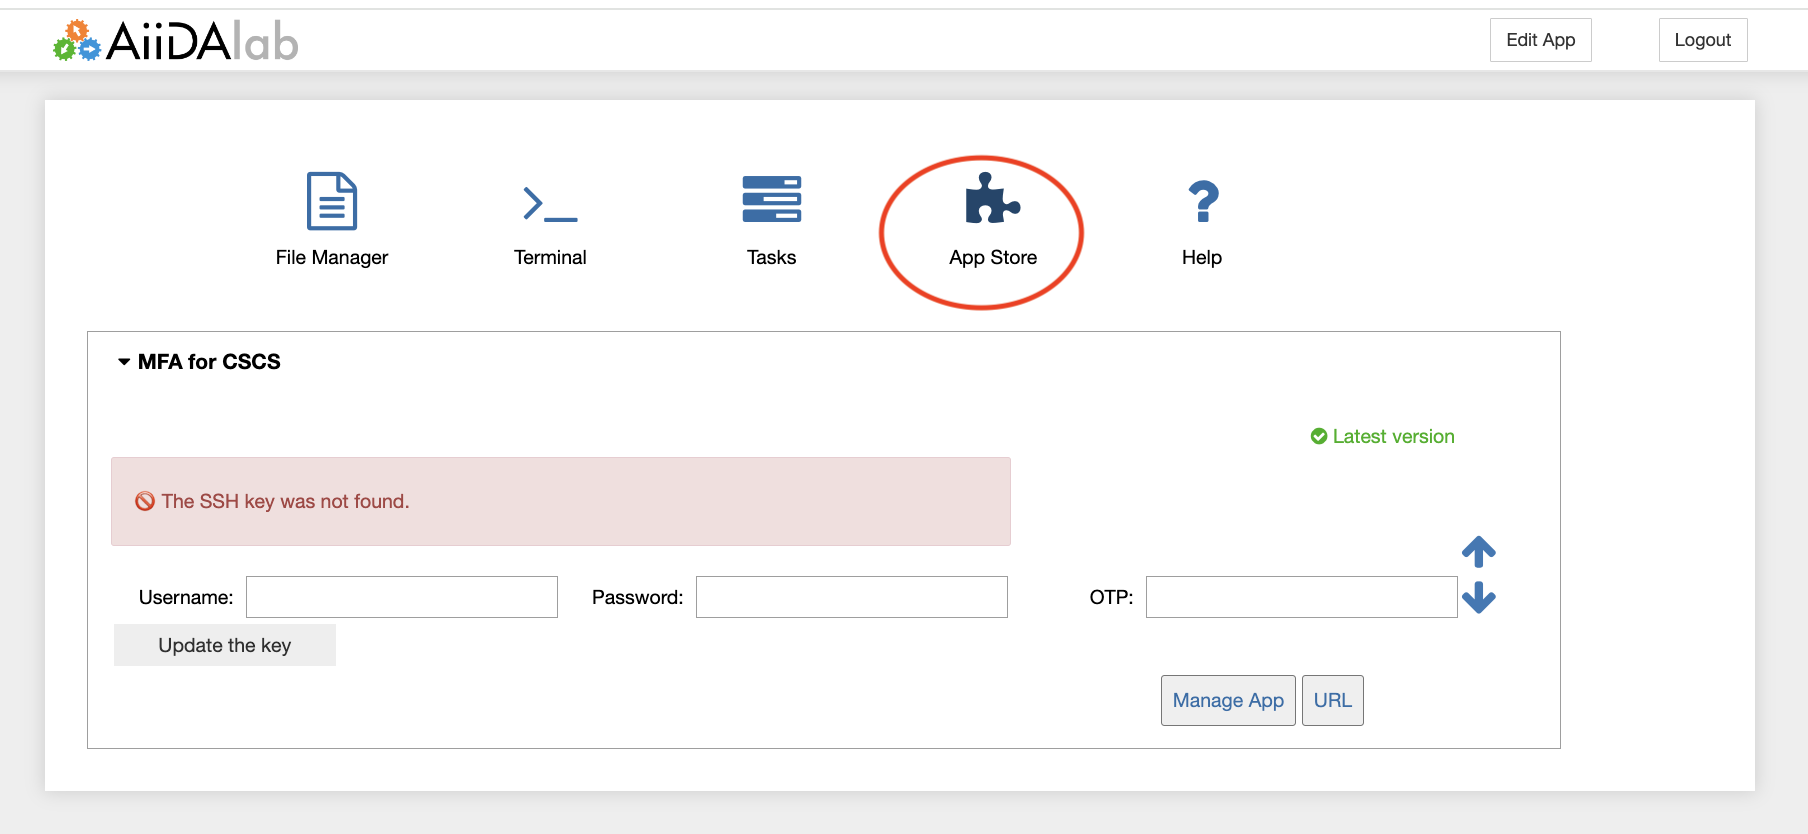

On the second page, we find this app,

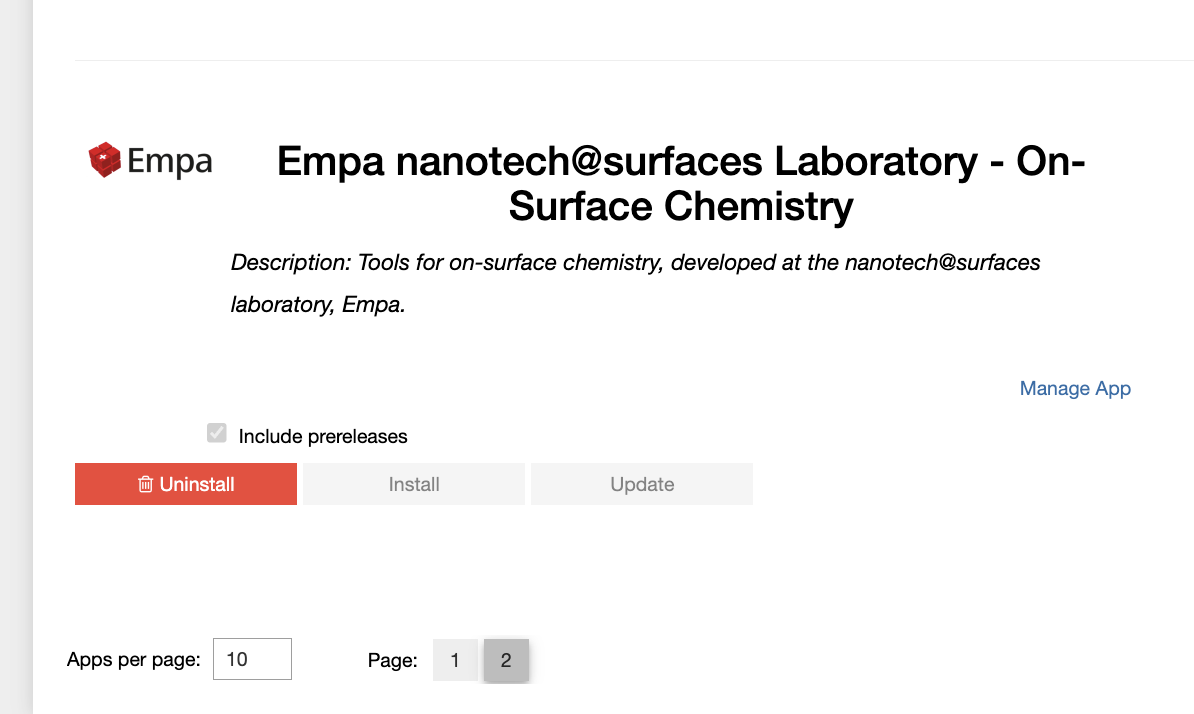

and we select "Include prereleases" and then install the last proposed version, it will take some minutes.

Coming back on the home page **AFTER THE GEAR ON THE TOP RIGHT HAS STOP TURNING**, we will see the following situation

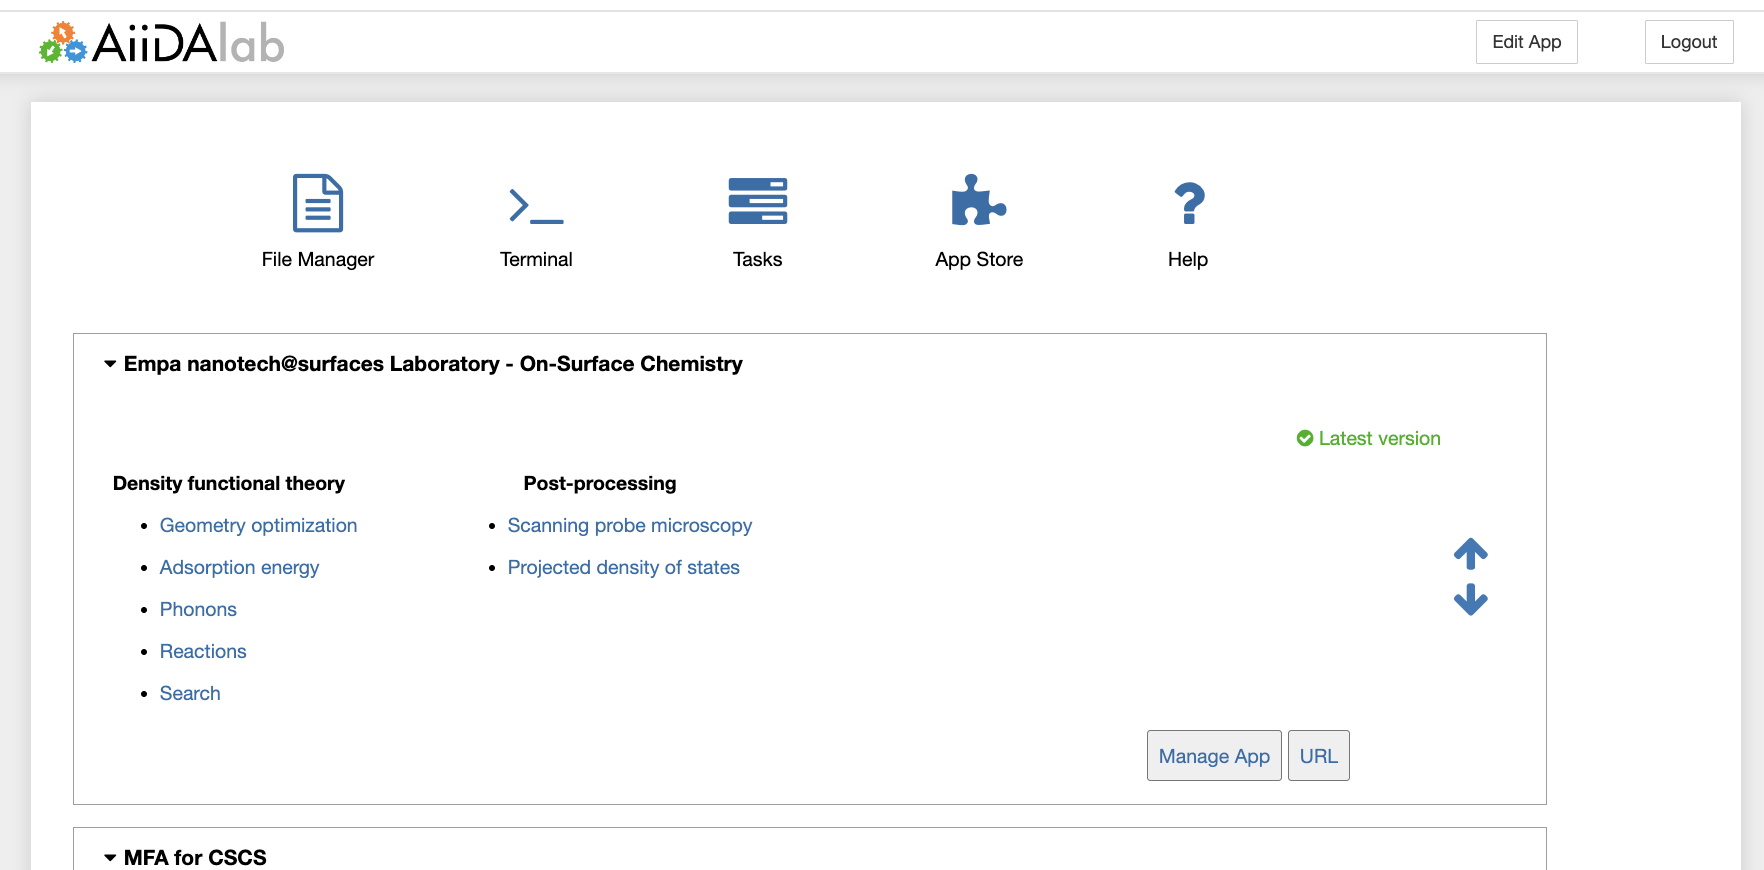

Open a terminal and execute the following commands:

```
cd $HOME 
mkdir soft 
cd soft
git clone https://github.com/nanotech-empa/cp2k-spm-tools.git
conda install -c conda-forge mpi4py # <---- THIS COMMAND NEEDS TO BE REPEATED EVERY TIME AFTER YOU RESET THE DOCKER
verdi code create core.code.installed --config ~/MMM_2024/Exercise_5/stm.yml
chmod a+x /home/jovyan/soft/cp2k-spm-tools/*.py
cd $HOME/MMM_2024/Exercise_5
```     
At this point you are back in the `Exercise_5` directory, ready to continue.

Note that the command **conda install -c conda-forge mpi4py** will have to be repeated every time you reset the docker.

In [2]:
#
# some important Imports...
#
import numpy as np
from ase import Atoms
from ase.io import read
from ase.visualize import view
import matplotlib.pyplot as plt
import nglview as nv

In [3]:
#
# and definitions of visualization functions (see last exercises)
#
def view_structure(structure,myvec=[]):
    t = nv.ASEStructure(structure)
    w = nv.NGLWidget(t, gui=True)
    w.add_unitcell()
    w.add_ball_and_stick()
    w.add_representation('label',label_type='atomindex',color='black')
    w.add_representation('spacefill',selection=myvec,color="blue",radius=0.5)
    return w

def view_trajectory(trajectory,myvec=[]):
    t2 = nv.ASETrajectory(trajectory)
    w2 = nv.NGLWidget(t2, gui=True)
    #w2.add_unitcell()
    w2.add_ball_and_stick()
    w2.add_representation('spacefill',selection=myvec,color="blue",radius=0.5)
    return w2

## Learning to launch a simulations: C2H2 molecule. 

Go to the AiiDAlab home page (clicking on the logo top left with the right mouse button, open a new tab), and select to start a geometry optimization:
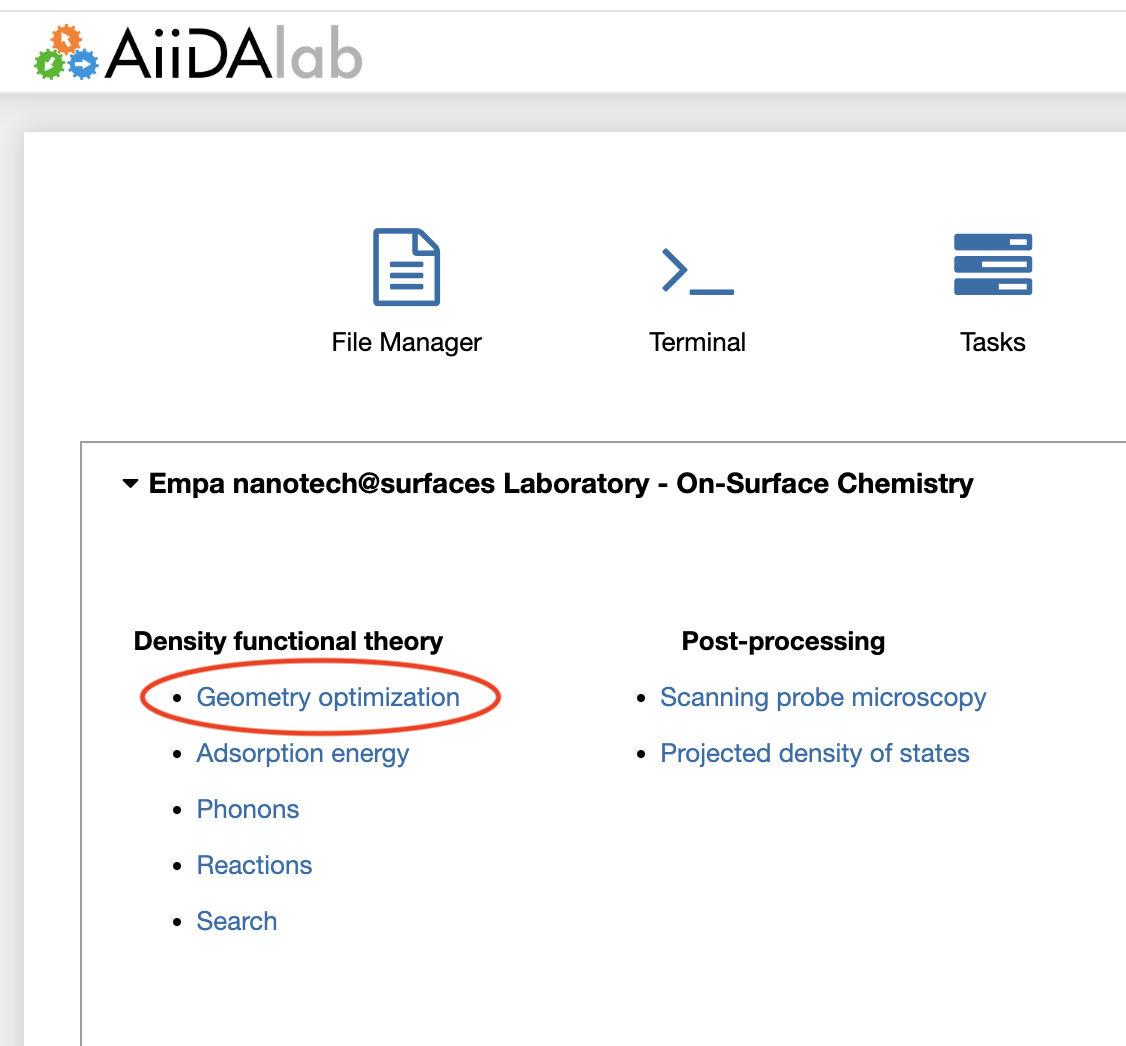

You will land on a page similar to this, and you can import the structure. We select: **FROM SMILES**
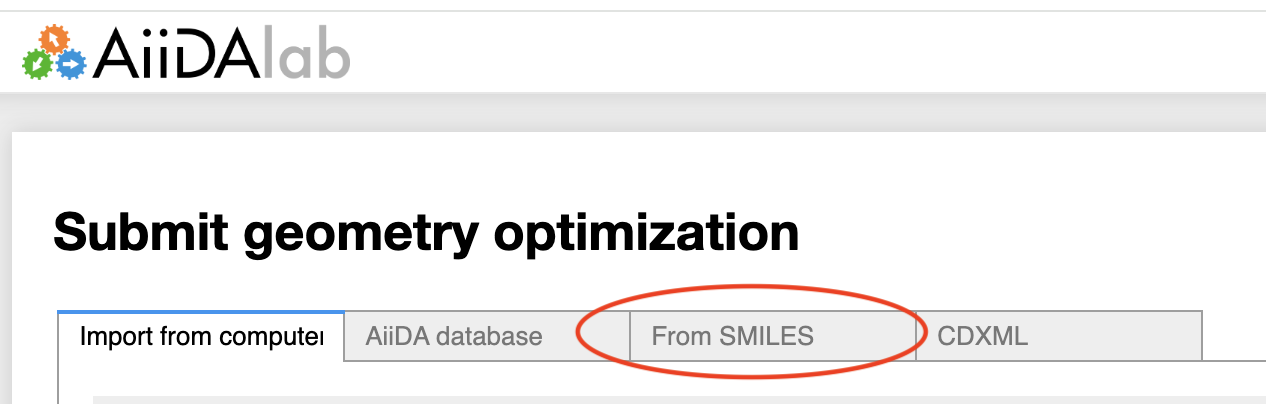

Now, on google it is easy to find the SMILES of a given molecule. SMILES is the “Simplified Molecular Input Line Entry System,” which is used to translate a chemical's three-dimensional structure into a string of symbols that is easily understood by computer software. In general, hydrogen atoms are derived from simple rules (carbon has four bonds, oxygen two bonds, nitrogen three bonds). In the case of  **C2H2** the SMILE is as simple as **C#C** (triple bond) and 
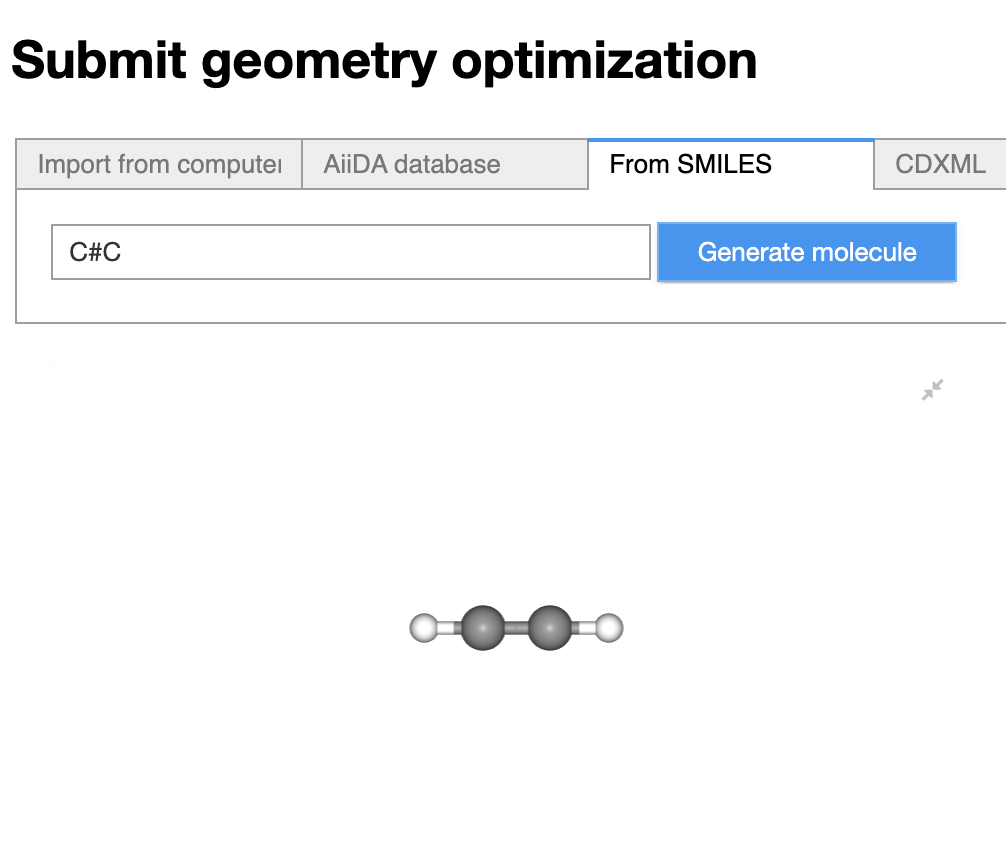

**GENERATE MOLECULE** will show our acetylene, already in a good shape. 


To add some interest, we learn how to modify the structure by hand, clicking "edit structure"

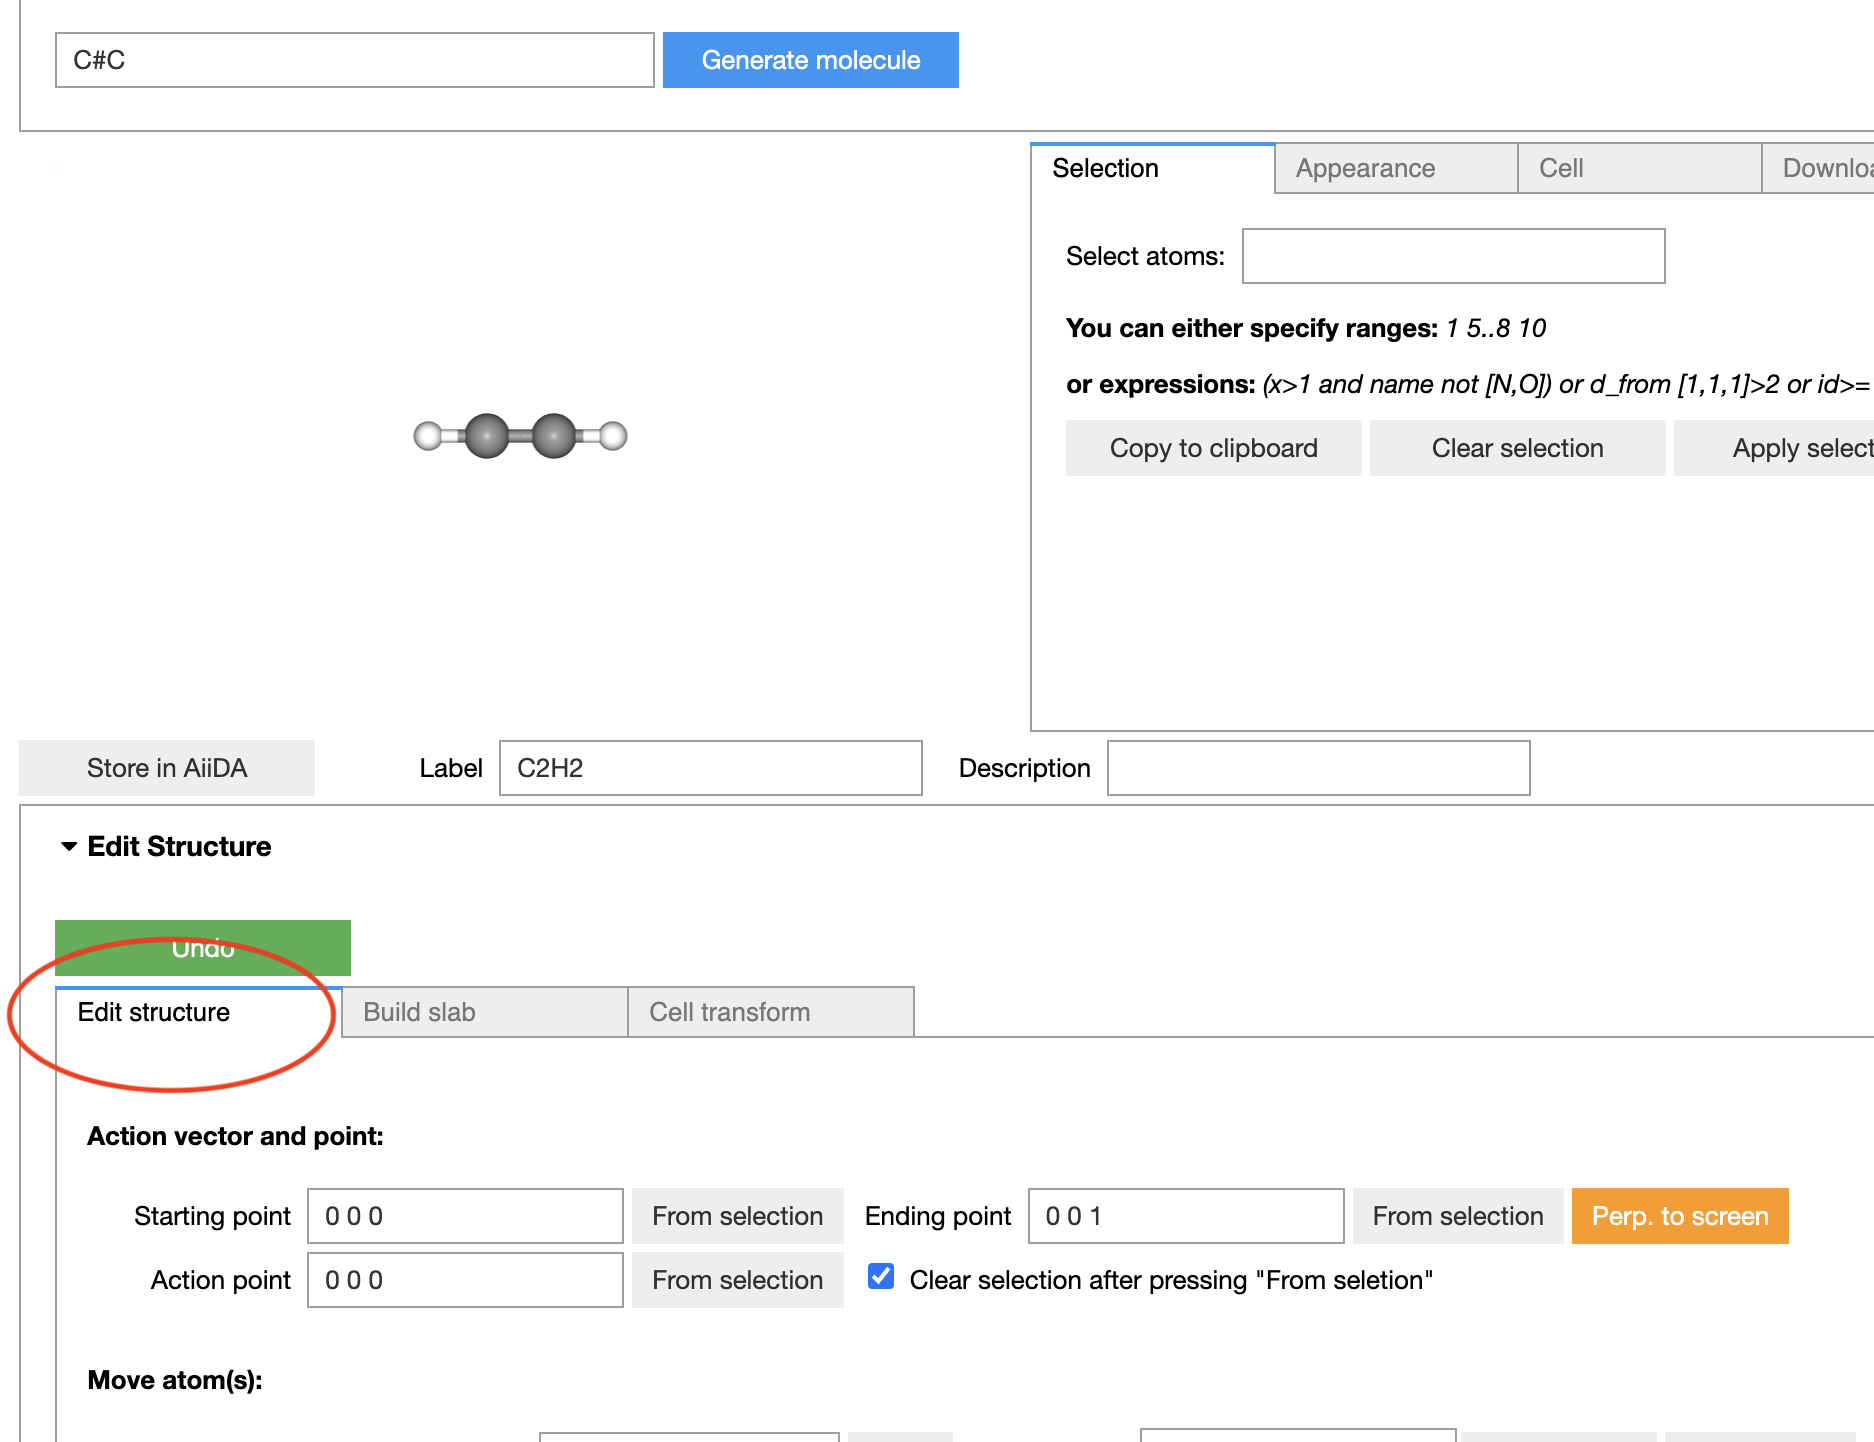

and then we move the right CH group a bit to the right. We first define a line along which we move some selected atoms. Click on one "C" (green) then "Action vector", "Starting point", "From selection" 
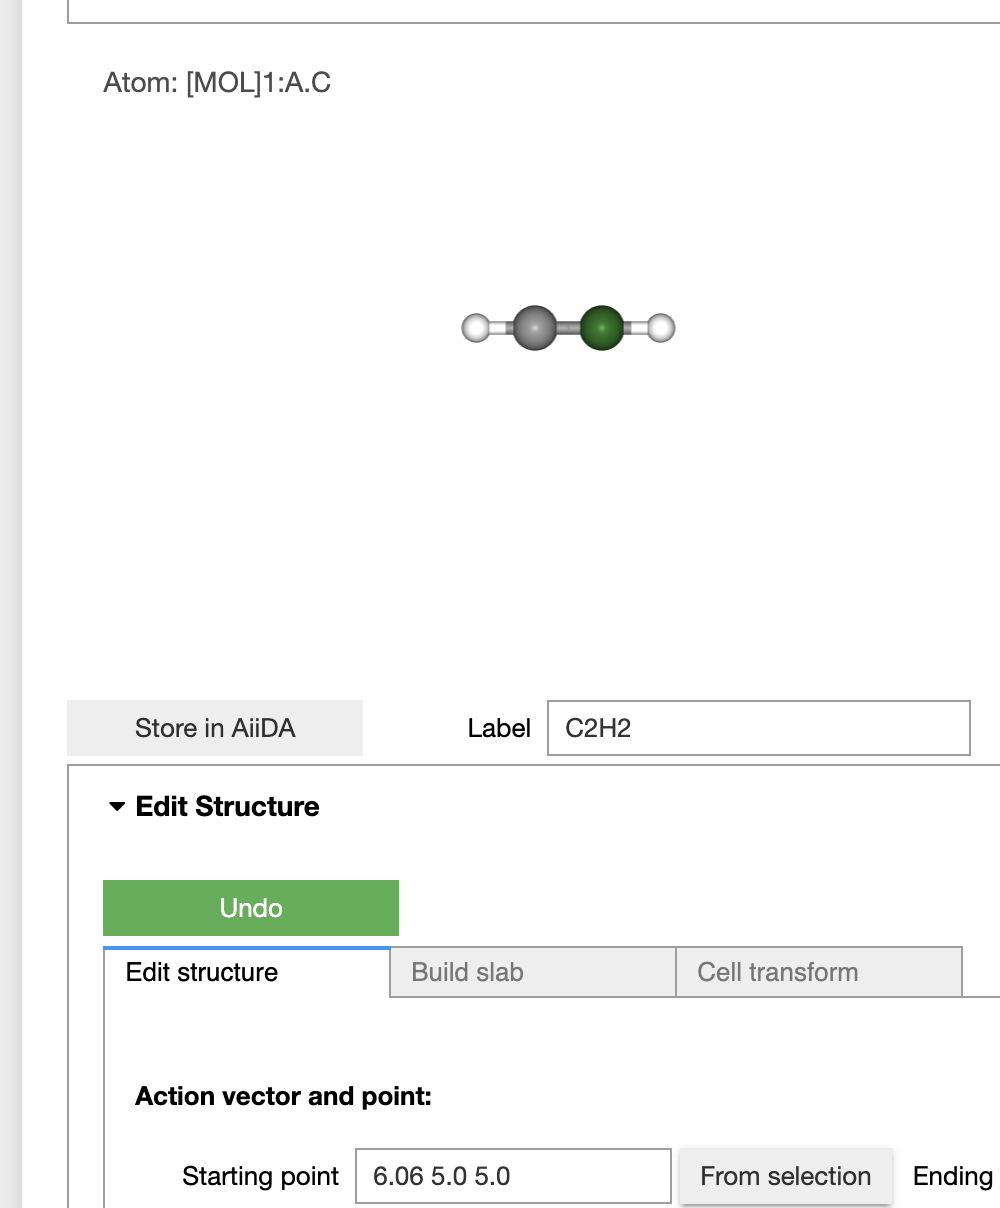

then click on the H to the right, then "Ending point", "From selection".
Now your action vector is defined. 
Select both atoms one after the other, and then "Move along action vector by" and choose a displacement (in Angstrom)
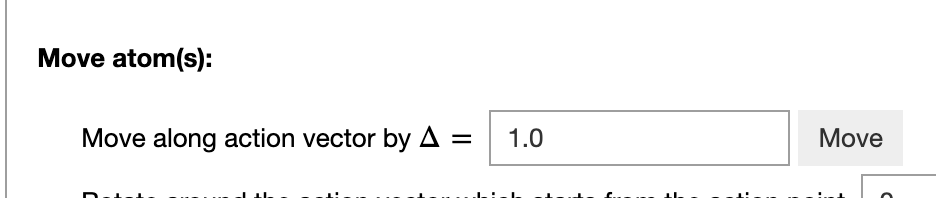

Now your molecule is deformed.


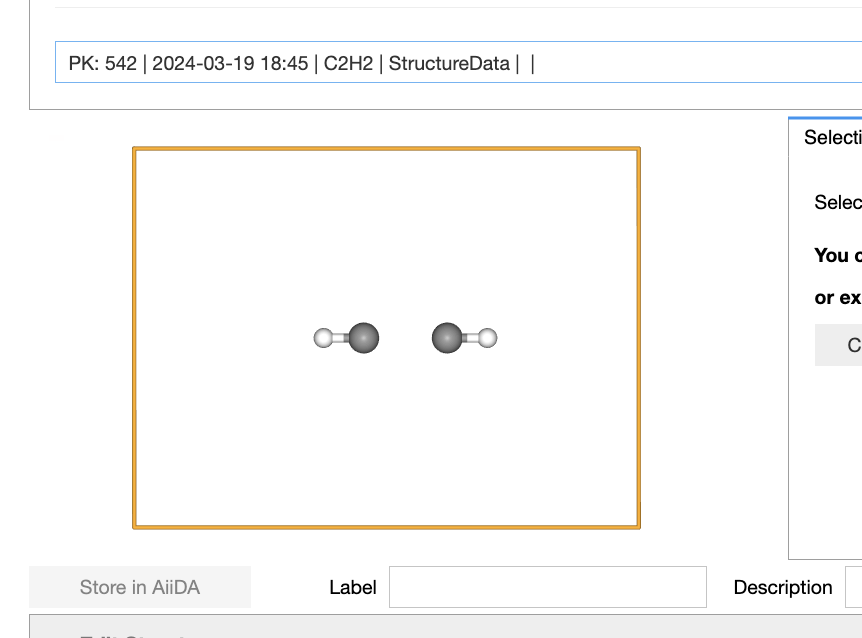



We now give some parameters:
1. Keep periodic to reduce computational cost
2. Include van der Waals dispersion corrections
3. Low accuracy to loosen the convergence threshold
4. The code we use (cp2k)
5. Only one node, one core (very important!!!)
6. A name

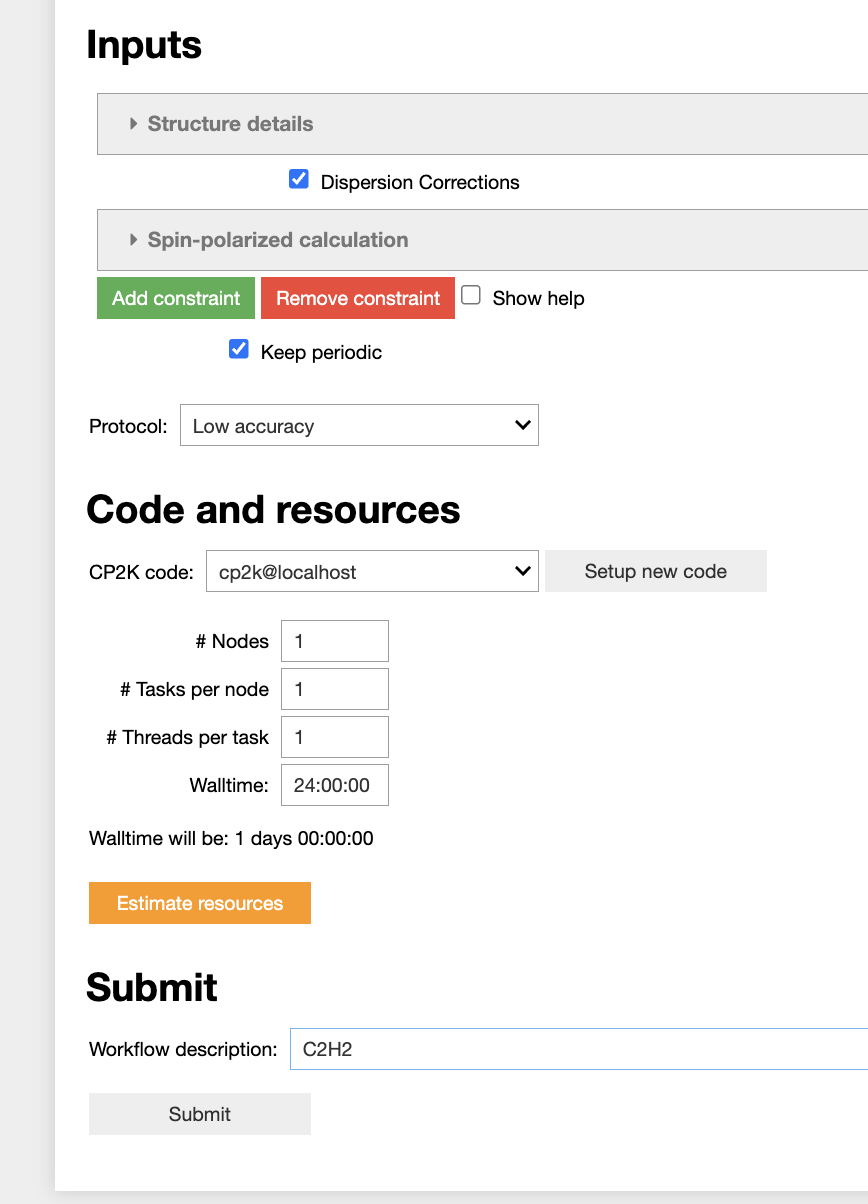

### FINALLY, WE SUBMIT THE SIMULATION (SUBMIT) ###

Now the simulation is running. From the terminal (OR FROM THIS NOTEBOOK, INDIVIDUALLY) we can give the command
    
    verdi process list -a

and follow if the simulation is running. 
We will see something like that:

     504  20s ago    Cp2kGeoOptWorkChain               ⏵ Waiting         Waiting for child processes: 512
     512  19s ago    Cp2kBaseWorkChain                 ⏵ Waiting         Waiting for child processes: 513
     513  19s ago    Cp2kCalculation                   ⏵ Waiting         Monitoring scheduler: job state RUNNING

    Total results: 110

    Report: last time an entry changed state: 19s ago (at 18:19:48 on 2024-03-19)
    Report: Checking daemon load... OK
    Report: Using 2% of the available daemon worker slots.
    (base) jovyan@4491cdac9486:~/MMM_2024/Exercise_5$

and we can also access the running directory. In our case, 

    verdi calcjob gotocomputer 513
   

and we can have a look at the running output files. Type **exit (ENTER)** to go back to the original shell.
At the end of the geometry optimization (5-10 minutes), our 

    verdi process list -a 
    
will show an output like:

     504  4m ago     Cp2kGeoOptWorkChain               ⏹ Finished [0]
     512  4m ago     Cp2kBaseWorkChain                 ⏹ Finished [0]
     513  4m ago     Cp2kCalculation                   ⏹ Finished [0]
     519  1m ago     merge_trajectory_data_non_unique  ⏹ Finished [0]
     
indicating that the Geometry optimization workchain is finished. 
Hitting "search" from the home page

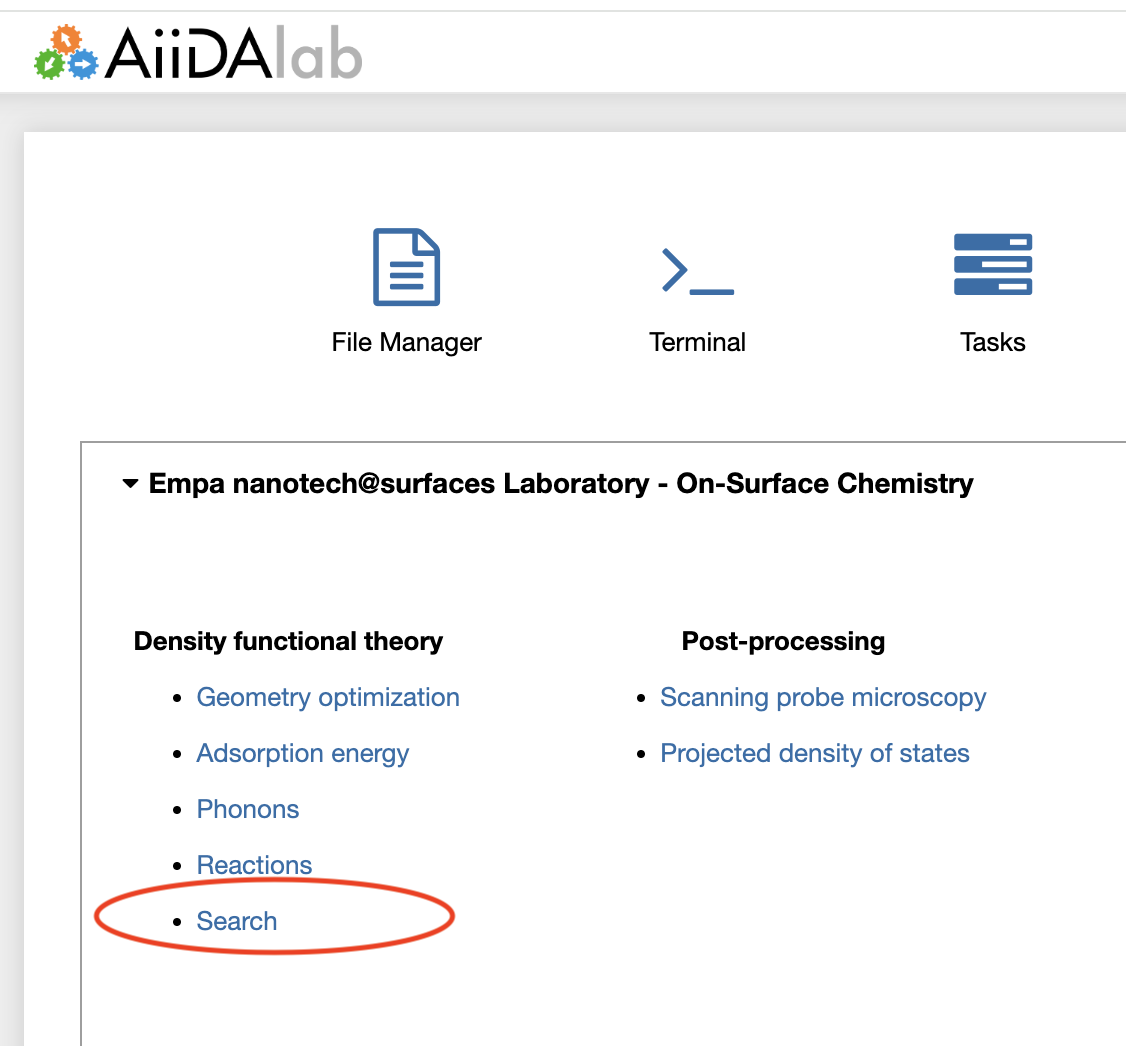

will lead us to a page with all finished calculations, that we can then investigate individually:

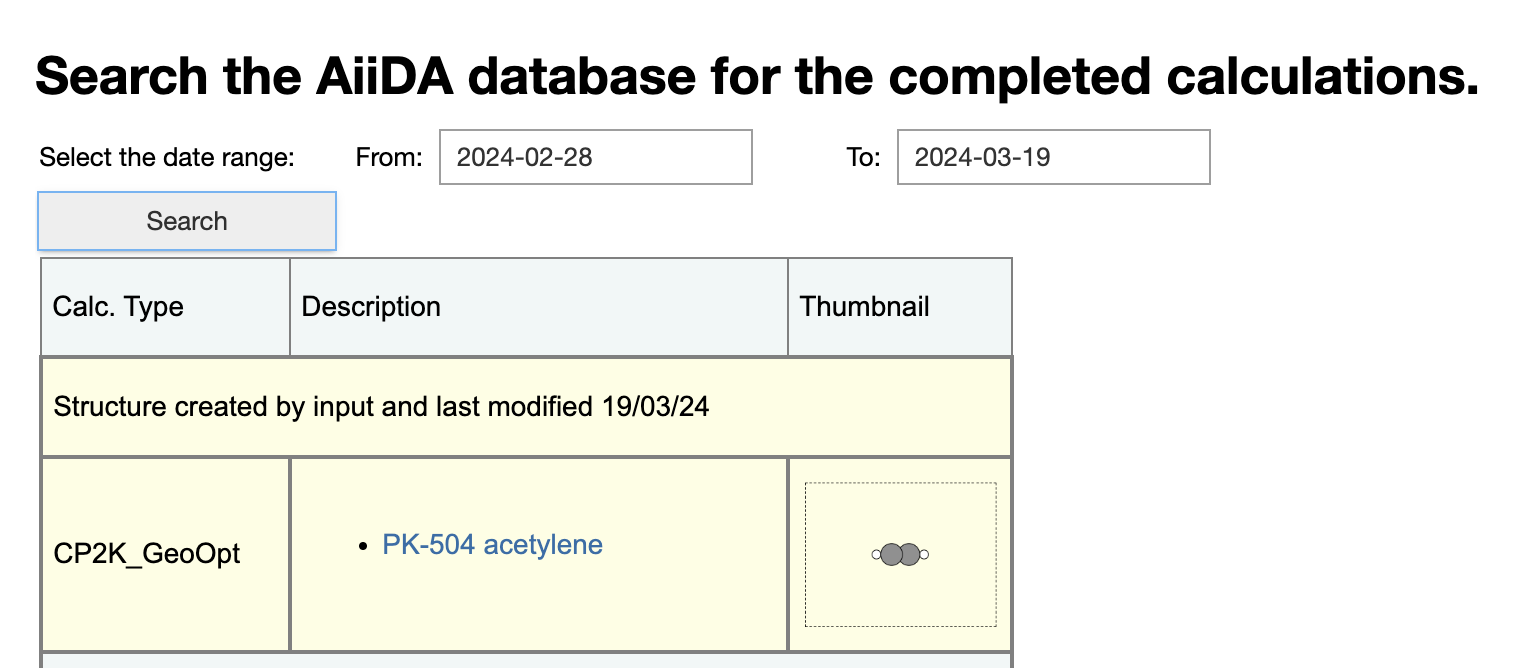

In [5]:
verdi process list -a

  PK  Created    Process label                     Process State     Process status
----  ---------  --------------------------------  ----------------  ----------------
   7  12h ago    Cp2kGeoOptWorkChain               ⏹ Finished [0]
  15  12h ago    Cp2kBaseWorkChain                 ⏹ Finished [0]
  16  12h ago    Cp2kCalculation                   ⏹ Finished [0]
  22  12h ago    merge_trajectory_data_non_unique  ⏹ Finished [0]
  27  12h ago    Cp2kOrbitalsWorkChain             ⏹ Finished [390]
  31  12h ago    Cp2kDiagWorkChain                 ⏹ Finished [0]
  38  12h ago    Cp2kBaseWorkChain                 ⏹ Finished [0]
  39  12h ago    Cp2kCalculation                   ⏹ Finished [0]
  47  12h ago    Cp2kBaseWorkChain                 ⏹ Finished [0]
  48  12h ago    Cp2kCalculation                   ⏹ Finished [0]
  53  12h ago    StmCalculation                    ⏹ Finished [0]
  59  11h ago    Cp2kOrbitalsWorkChain             ⏹ Finished [0]
  63  11h ago    Cp2kDiagWorkChain  

In [7]:
#
#We can also see the input and output from here:
#
!verdi calcjob inputcat 122


!!! Generated by AiiDA !!!
&FORCE_EVAL
   &DFT
      BASIS_SET_FILE_NAME BASIS_MOLOPT
      CHARGE 0
      &MGRID
         CUTOFF 600
         NGRIDS 5
      &END MGRID
      MULTIPLICITY 0
      &POISSON
         PERIODIC XYZ
         POISSON_SOLVER PERIODIC
      &END POISSON
      POTENTIAL_FILE_NAME POTENTIAL
      &PRINT
         &E_DENSITY_CUBE
            ADD_LAST NUMERIC
            &EACH
               GEO_OPT 0
               QS_SCF 0
            &END EACH
            STRIDE 2 2 2
         &END E_DENSITY_CUBE
         &MO_CUBES
            ADD_LAST NUMERIC
            &EACH
               GEO_OPT 0
               QS_SCF 0
            &END EACH
            NHOMO 1
            NLUMO 1
            STRIDE 4 4 4
         &END MO_CUBES
         &V_HARTREE_CUBE
            ADD_LAST NUMERIC
            &EACH
               GEO_OPT 0
               QS_SCF 0
            &END EACH
            FILENAME HART
            STRIDE 2 2 2
         &END V_HARTREE_CUBE
      &END PRINT
      &QS


In [51]:
!verdi calcjob outputcat 513

 DBCSR| CPU Multiplication driver                                           BLAS
 DBCSR| Multrec recursion limit                                              512
 DBCSR| Multiplication stack size                                           1000
 DBCSR| Maximum elements for images                                    UNLIMITED
 DBCSR| Multiplicative factor virtual images                                   1
 DBCSR| Use multiplication densification                                       T
 DBCSR| Multiplication size stacks                                             3
 DBCSR| Use memory pool for CPU allocation                                     F
 DBCSR| Number of 3D layers                                               SINGLE
 DBCSR| Use MPI memory allocation                                              F
 DBCSR| Use RMA algorithm                                                      F
 DBCSR| Use Communication thread                                               T
 DBCSR| Communication thread

### We discovered the pk of our simulation. Suppose it is 504 (will be different for you!) We run

In [8]:
verdi process show 113

Property     Value
-----------  ------------------------------------
type         Cp2kGeoOptWorkChain
state        Finished [0]
pk           113
uuid         8aaaf0a4-3942-491e-8f1a-9030bc664987
label        CP2K_GeoOpt
description  Acetylene
ctime        2024-03-20 09:50:06.069612+00:00
mtime        2024-03-20 09:57:37.406044+00:00

Inputs        PK  Type
----------  ----  -------------
code           1  InstalledCode
dft_params   111  Dict
protocol     109  Str
structure    110  StructureData
sys_params   112  Dict

Outputs              PK  Type
-----------------  ----  --------------
output_parameters   125  Dict
output_structure    126  StructureData
output_trajectory   129  TrajectoryData
remote_folder       123  RemoteData
retrieved           124  FolderData

Called      PK  Type
--------  ----  -----------------
CALL       121  Cp2kBaseWorkChain

Log messages
---------------------------------------------
There are 3 log messages for this calculation
Run 'verdi process report 113

Now we will look for the optimization trajectory, to visualize it with our apps. Suppose that the line

    output_trajectory   520  TrajectoryData
    
contains the pk 520, then we hit:

In [9]:
trajpk = 129
traj = load_node(trajpk)
symbols = traj.symbols
trajase=[traj.get_step_structure(step-1).get_ase() for step in traj.get_stepids()]
for a in trajase:
    a.set_pbc([False,False,False])

In [10]:
view_trajectory(trajase)

#
# The optimization trajectory is shown.
#

NGLWidget(max_frame=9)

Now we compute the orbitals. To this end, we launch a "scanning probe microscopy" simulation from the AiiDAlab home page. The structure is chosen from the AiiDA database, the one we just optimized!

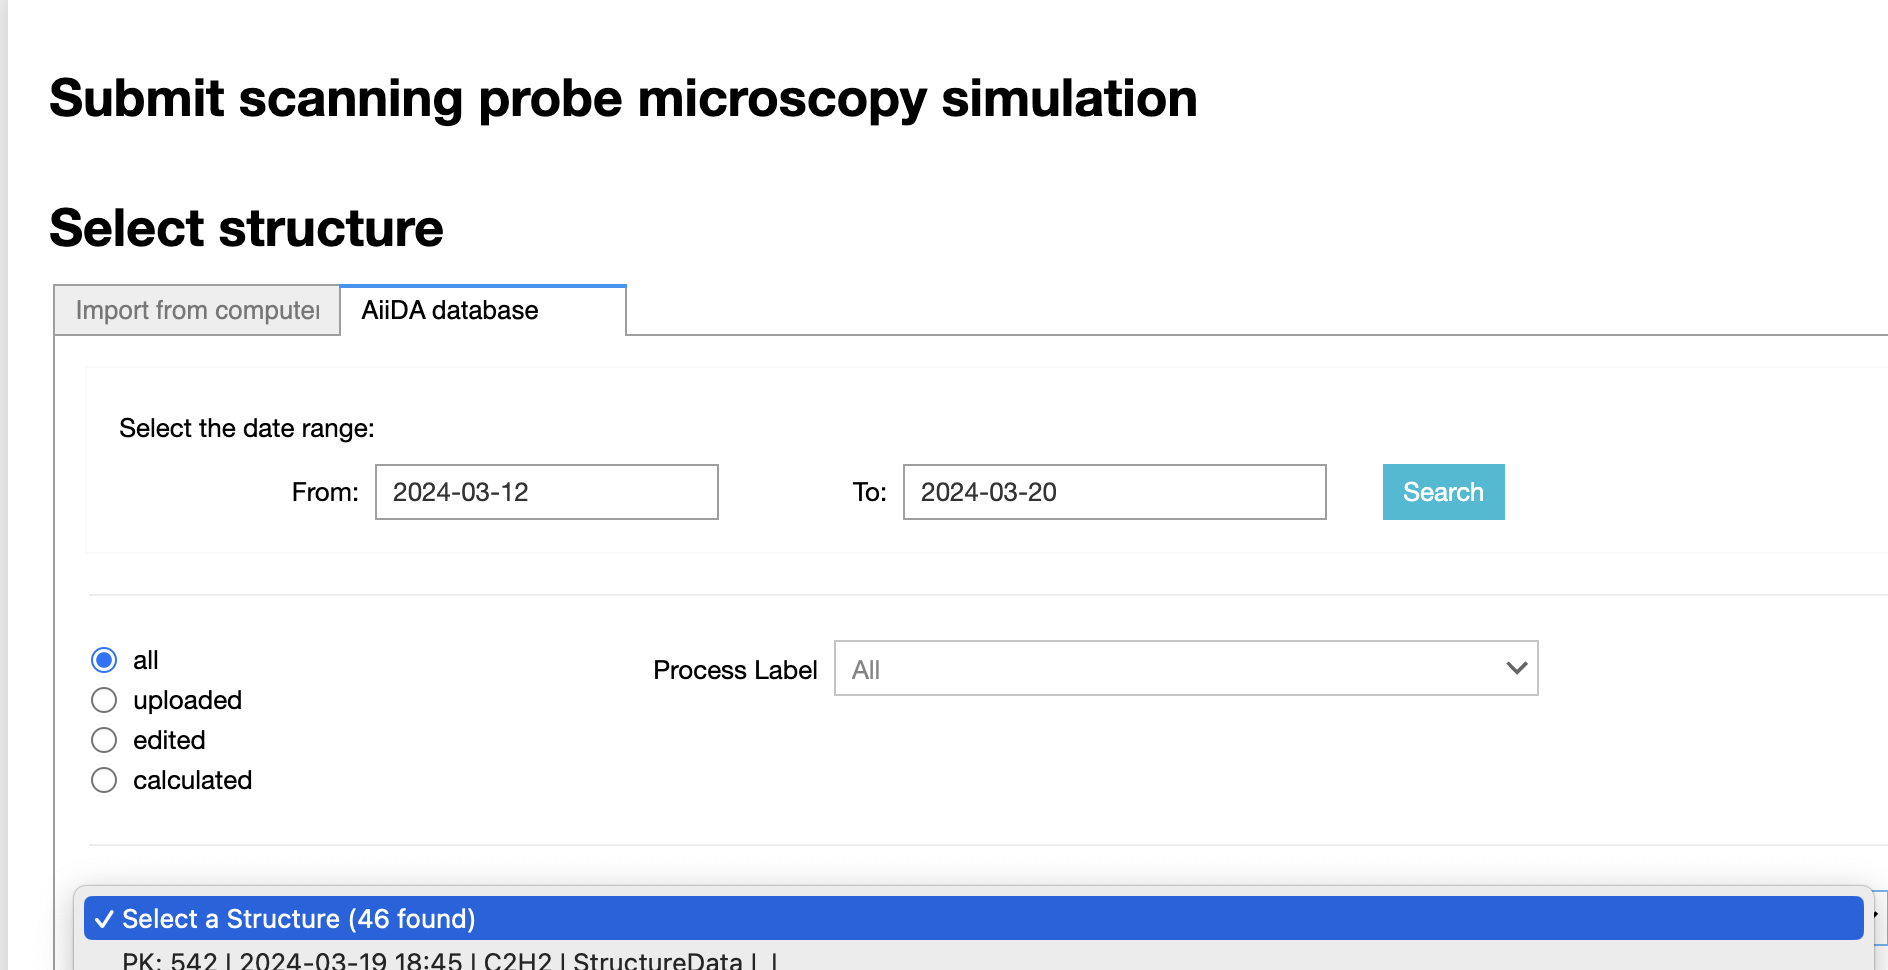

The important parameters are shown here:

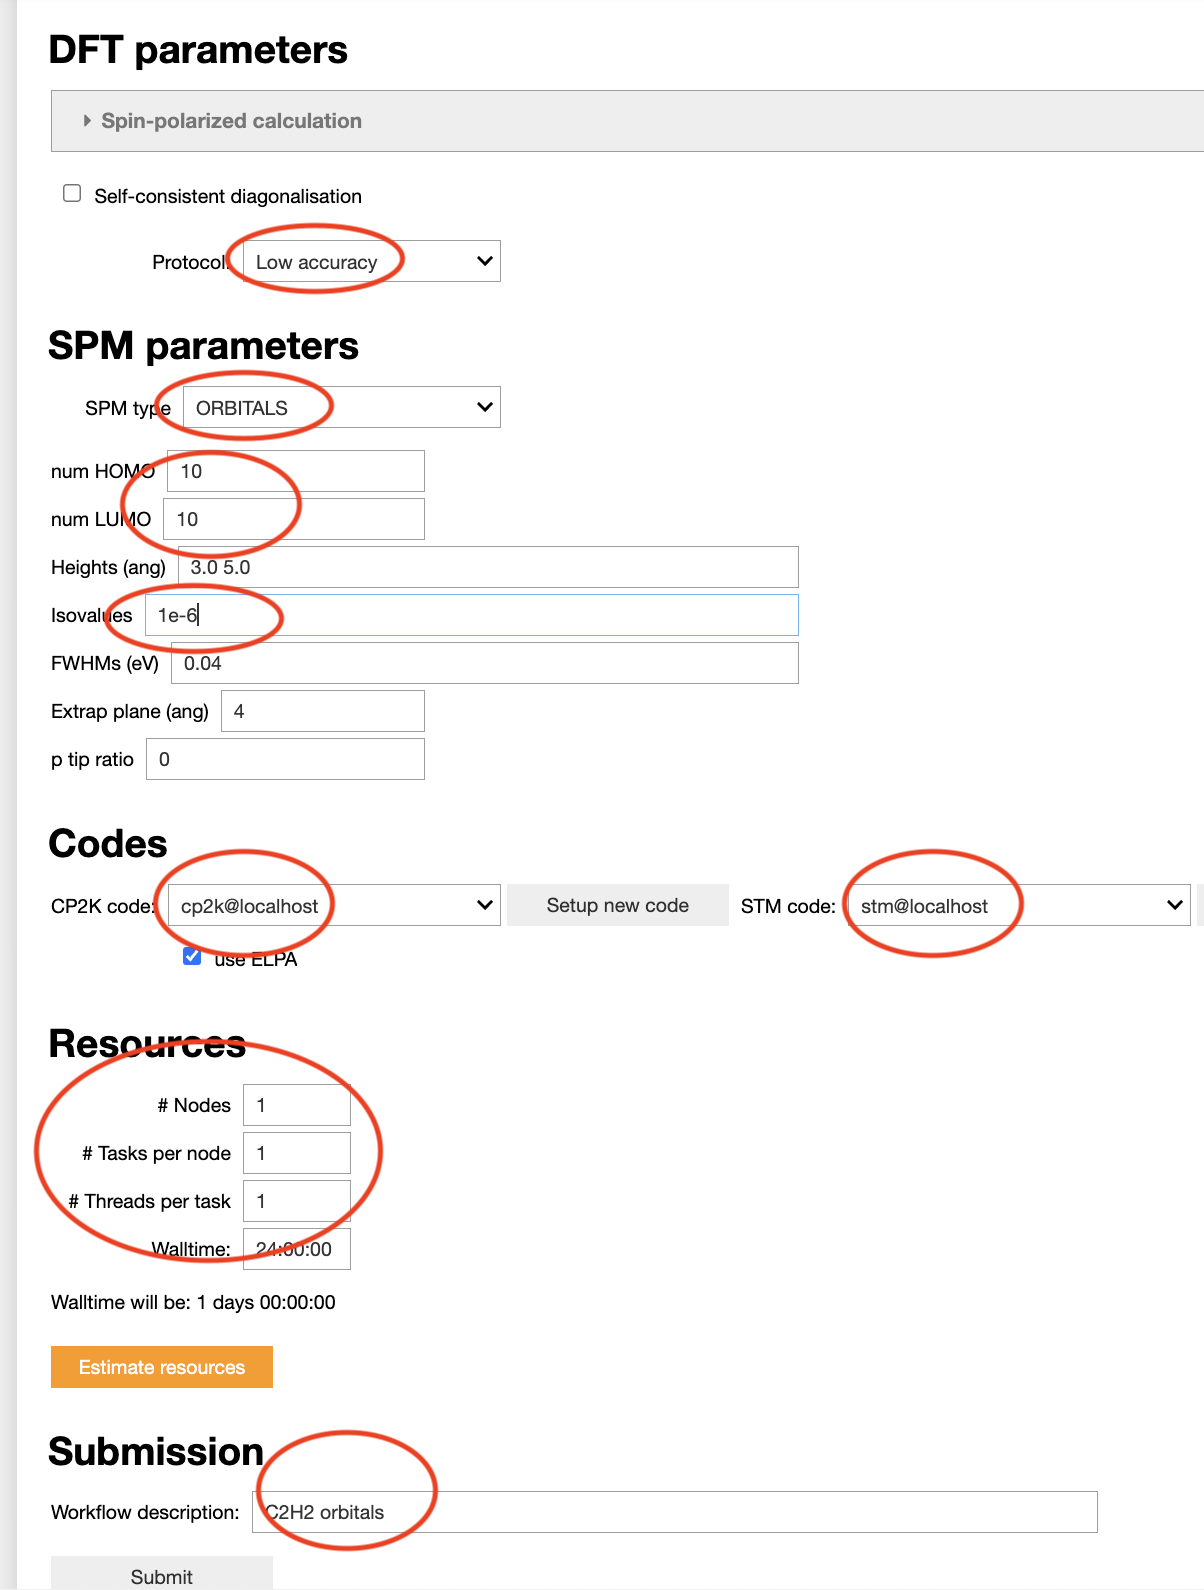

**NOTE THAT THE NUMBER OF OCCUPIED AND UNOCCUPIED ORBITALS HAS TO BE ADAPTED. FOR CARBON, ONLY 4 ELECTRONS PER ATOM  (CORE ELECTRONS ARE IMPLICIT) ARE CONSIDERED. SO WE HAVE 4+4+1+1 ELECTRONS = 10 IN 5 OCCUPIED ORBITALS (SPIN UP AND SPIN DOWN. Modify the mask accordingly**

Then hit "SUBMIT"

With 

    verdi process list -a

you can check when the calculation of the orbitals is finished.

In [11]:
verdi process list -a

  PK  Created    Process label                     Process State     Process status
----  ---------  --------------------------------  ----------------  ----------------
   7  12h ago    Cp2kGeoOptWorkChain               ⏹ Finished [0]
  15  12h ago    Cp2kBaseWorkChain                 ⏹ Finished [0]
  16  12h ago    Cp2kCalculation                   ⏹ Finished [0]
  22  12h ago    merge_trajectory_data_non_unique  ⏹ Finished [0]
  27  12h ago    Cp2kOrbitalsWorkChain             ⏹ Finished [390]
  31  12h ago    Cp2kDiagWorkChain                 ⏹ Finished [0]
  38  12h ago    Cp2kBaseWorkChain                 ⏹ Finished [0]
  39  12h ago    Cp2kCalculation                   ⏹ Finished [0]
  47  12h ago    Cp2kBaseWorkChain                 ⏹ Finished [0]
  48  12h ago    Cp2kCalculation                   ⏹ Finished [0]
  53  12h ago    StmCalculation                    ⏹ Finished [0]
  59  12h ago    Cp2kOrbitalsWorkChain             ⏹ Finished [0]
  63  12h ago    Cp2kDiagWorkChain  

Once finished, we go to the **search** page of AiiDAlab and hit the "Orbitals" simulation, just finished. And we land on this page:

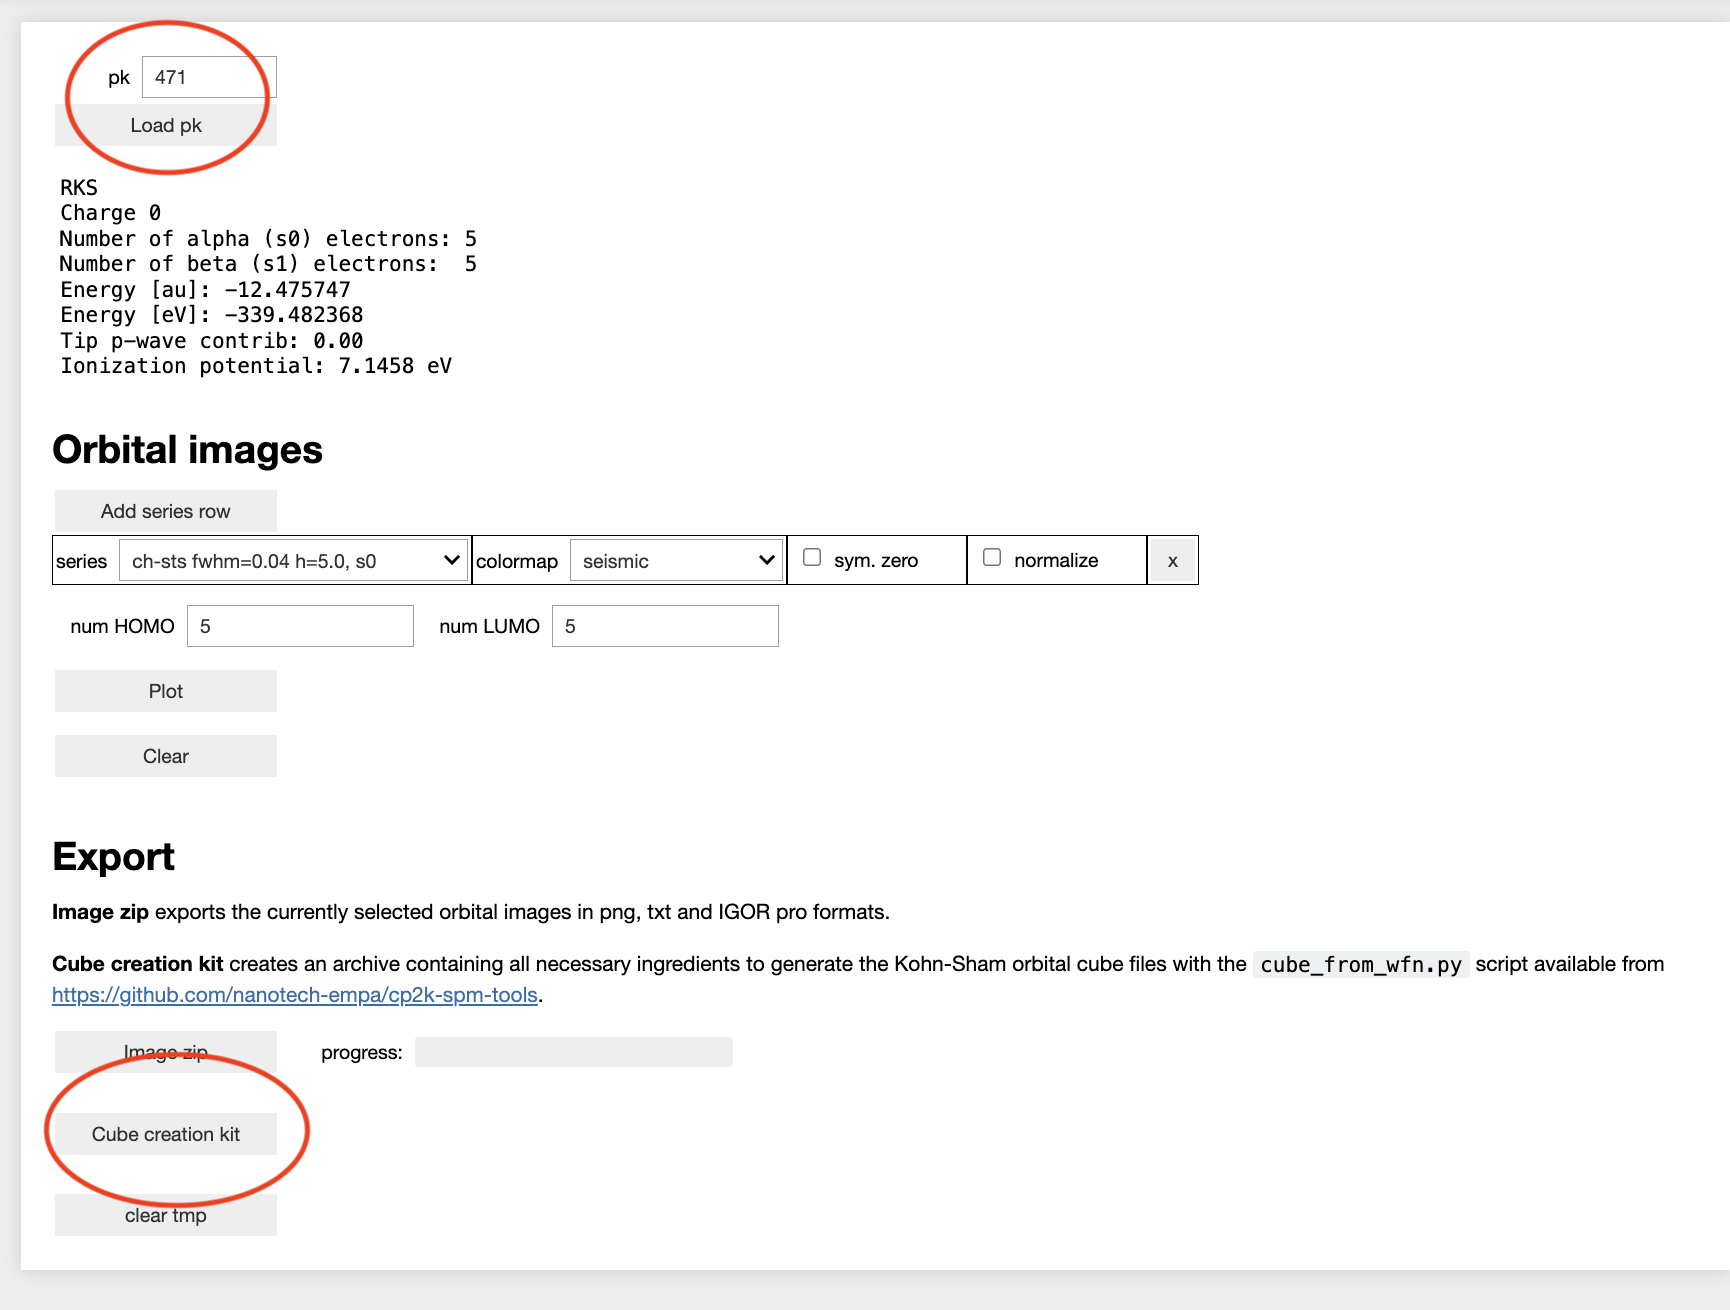

We can visualize STM images of the orbitals, but it is important to hit the button 

**Cube creation kit** 

which will generate a series of files that are important to create the orbitals grid files from the wavefunction.
Note also the 

**Pk number** of this job, we will need it now.

Check the file **run_cube_from_wfn_acetylene.sh** in the Exercise directory, and note that it requests the number of occupied and unoccupied orbitals (n_homo and n_lumo) that we have requested in our STM/ORBITALS simulation.




In [33]:
!cat run_cube_from_wfn_acetylene.sh

#!/bin/bash -l

DIR="./"

mkdir cubes

/home/jovyan/soft/cp2k-spm-tools/cube_from_wfn.py \
  --cp2k_input_file $DIR/aiida.inp \
  --basis_set_file BASIS_MOLOPT \
  --xyz_file $DIR/aiida.coords.xyz \
  --wfn_file $DIR/aiida-RESTART.wfn \
  --output_dir ./cubes/ \
  --n_homo 5 \
  --n_lumo 5 \
  --dx 0.2 \
  --eval_cutoff 14.0 \



Now we are ready to generate the orbital cube files.

In [12]:
#
# Creating the cube file of the orbitals
# 
my_pk = 133
!rm -Rf ./cube-kit-pk{my_pk}*
!cp /home/jovyan/apps/surfaces/tmp/cube-kit-pk{my_pk}.zip .
!unzip cube-kit-pk{my_pk}.zip
!cp run_cube_from_wfn_acetylene.sh ./cube-kit-pk{my_pk}
!cd ./cube-kit-pk{my_pk} ; bash run_cube_from_wfn_acetylene.sh ; ls cubes/*cube

Archive:  cube-kit-pk133.zip
  inflating: cube-kit-pk133/BASIS_MOLOPT  
  inflating: cube-kit-pk133/aiida.inp  
  inflating: cube-kit-pk133/aiida.out  
  inflating: cube-kit-pk133/aiida.coords.xyz  
  inflating: cube-kit-pk133/aiida-RESTART.wfn  
R0/1, loading indexes (s0/1) 0:9 / 0:9
eval_cell_n:  [67 50 50]
loc_cell_n:  [71 70 70]
---- Setup: 0.0027
---- Radial calc time : 0.414843
---- Spherical calc time : 0.034275
---- Loc -> loc_morb time : 0.156569
---- loc_morb -> glob time : 0.033395
---- Total time: 0.6632
R0/1 is writing HOMO-4 cube
R0/1 is writing HOMO-3 cube
R0/1 is writing HOMO-2 cube
R0/1 is writing HOMO-1 cube
R0/1 is writing HOMO+0 cube
R0/1 is writing HOMO+1 cube
R0/1 is writing HOMO+2 cube
R0/1 is writing HOMO+3 cube
R0/1 is writing HOMO+4 cube
R0/1 is writing HOMO+5 cube
R0/1: finished, total time: 1.55s
cubes/S0_10_LUMO+4.cube  cubes/S0_4_HOMO-1.cube  cubes/S0_8_LUMO+2.cube
cubes/S0_1_HOMO-4.cube	 cubes/S0_5_HOMO.cube	 cubes/S0_9_LUMO+3.cube
cubes/S0_2_HOMO-3.cube	

In [13]:
#
# this is the part to create the visualizations and captions. Adapt nhomo and nlumo!!!
# 

nhomo = 5
nlumo = 5

nfile = 1
nhomonow = nhomo
nlumonow = -1
mydict = {}

views =[]
captions = []
filenames = []

for i in range (nhomo+nlumo):
    if (nfile <= nhomo):
        nhomonow = nhomonow-1
        midfix = 'HOMO'
        ind = nhomonow
        strind = '-'+str(ind)
    else:
        nlumonow = nlumonow+1
        midfix = 'LUMO'
        ind = nlumonow
        strind = '+'+str(ind)
    if (ind == 0):
        strind = ''
    totstring = "S0_"+str(nfile)+'_'+midfix+strind+'.cube'
    nfile = nfile+1
    myfile = './cube-kit-pk' + str(my_pk) + '/cubes/' + totstring
    atoms = read(myfile)
    filenames.append(myfile)
    print (nfile-2,myfile)
    file = myfile
    a=!head -2 {file} | tail -1
    b = str(a)
    ene=(b[4:13])
    views.append(nv.NGLWidget())
    captions.append(midfix+strind+" E= "+ene+" eV")
    views[nfile-2].add_component(nv.ASEStructure(atoms))
    c_2 = views[nfile-2].add_component(file)
    c_2.clear()
    c_2.add_surface(color='blue', isolevelType="value", isolevel=-0.01, opacity=0.05)
    c_3 = views[nfile-2].add_component(file)
    c_3.clear()
    c_3.add_surface(color='red', isolevelType="value", isolevel=0.01, opacity=0.05)

0 ./cube-kit-pk133/cubes/S0_1_HOMO-4.cube
1 ./cube-kit-pk133/cubes/S0_2_HOMO-3.cube
2 ./cube-kit-pk133/cubes/S0_3_HOMO-2.cube
3 ./cube-kit-pk133/cubes/S0_4_HOMO-1.cube
4 ./cube-kit-pk133/cubes/S0_5_HOMO.cube
5 ./cube-kit-pk133/cubes/S0_6_LUMO.cube
6 ./cube-kit-pk133/cubes/S0_7_LUMO+1.cube
7 ./cube-kit-pk133/cubes/S0_8_LUMO+2.cube
8 ./cube-kit-pk133/cubes/S0_9_LUMO+3.cube
9 ./cube-kit-pk133/cubes/S0_10_LUMO+4.cube


In [14]:
#
# And finally the visualization itself
#

import ipywidgets as widgets

myarray = []
for a in range(nhomo+nlumo):
    myarray.append(views[a])
    

caption =[]

for l in captions:
    caption.append(widgets.Text(l))

combined_w2 = []
for i in range(len(caption)):
    combined_w2.append(widgets.HBox([myarray[i],caption[i]]))


combined_widgets = widgets.VBox(combined_w2)
combined_widgets

Ok, now we can include all the orbital visualization stuff in a function.

In [15]:
def show_orbitals(molname,pk,nhomo,nlumo,isosurf=0.02,nfirstview=0,nlastview=5000):
    #
    # Click "cube creation kit" on the Orbitals aiidalab page ; note the pk
    #
    my_pk = pk
    !rm -Rf ./cube-kit-pk{my_pk}* ;
    !cp /home/jovyan/apps/surfaces/tmp/cube-kit-pk{my_pk}.zip . ;
    string = 'run_cube_from_wfn_'+molname+'.sh'
    !unzip cube-kit-pk{my_pk}.zip ;
    !cp {string} ./cube-kit-pk{my_pk} ;
    !cd ./cube-kit-pk{my_pk} ; bash {string} ; ls cubes/*cube ;
    #
    # Create the visualization of the orbitals
    #
    nfile = 1
    nhomonow = nhomo
    nlumonow = -1
    mydict = {}

    views =[]
    captions = []
    filenames = []

    for i in range (nhomo+nlumo):
        if (nfile <= nhomo):
            nhomonow = nhomonow-1
            midfix = 'HOMO'
            ind = nhomonow
            strind = '-'+str(ind)
        else:
            nlumonow = nlumonow+1
            midfix = 'LUMO'
            ind = nlumonow
            strind = '+'+str(ind)
        if (ind == 0):
            strind = ''
        totstring = "S0_"+str(nfile)+'_'+midfix+strind+'.cube'
        nfile = nfile+1
        myfile = './cube-kit-pk' + str(my_pk) + '/cubes/' + totstring
        atoms = read(myfile)
        filenames.append(myfile)
#        print (nfile-2,myfile)
        file = myfile
        a=!head -2 {file} | tail -1
        b = str(a)
        ene=(b[4:13])
        views.append(nv.NGLWidget())
        captions.append(midfix+strind+" E= "+ene+" eV")
        views[nfile-2].add_component(nv.ASEStructure(atoms))
        c_2 = views[nfile-2].add_component(file)
        c_2.clear()
        c_2.add_surface(color='blue', isolevelType="value", isolevel=-isosurf, opacity=0.5)
        c_3 = views[nfile-2].add_component(file)
        c_3.clear()
        c_3.add_surface(color='red', isolevelType="value", isolevel=isosurf, opacity=0.5)
    #
    # Visualize the orbitals and energy
    #
    import ipywidgets as widgets
    myarray = []
    for a in range(nhomo+nlumo):
        myarray.append(views[a])
    caption =[]
    for l in captions:
        caption.append(widgets.Text(l))
    combined_w2 = []
    for i in range(len(caption)):
        combined_w2.append(widgets.HBox([myarray[i],caption[i]]))
    combined_widgets = widgets.VBox(combined_w2[nfirstview:nlastview])
    return combined_widgets

In [18]:
#
# In this way, the molecule can be visualized with a call to the function followed by a call of the molecule itself
#
acetylene = show_orbitals('acetylene',pk=133,nhomo=5,nlumo=5,nfirstview=0,nlastview=2,isosurf=0.1);


Archive:  cube-kit-pk133.zip
  inflating: cube-kit-pk133/BASIS_MOLOPT  
  inflating: cube-kit-pk133/aiida.inp  
  inflating: cube-kit-pk133/aiida.out  
  inflating: cube-kit-pk133/aiida.coords.xyz  
  inflating: cube-kit-pk133/aiida-RESTART.wfn  
R0/1, loading indexes (s0/1) 0:9 / 0:9
eval_cell_n:  [67 50 50]
loc_cell_n:  [71 70 70]
---- Setup: 0.0024
---- Radial calc time : 0.399855
---- Spherical calc time : 0.034875
---- Loc -> loc_morb time : 0.150207
---- loc_morb -> glob time : 0.032261
---- Total time: 0.6416
R0/1 is writing HOMO-4 cube
R0/1 is writing HOMO-3 cube
R0/1 is writing HOMO-2 cube
R0/1 is writing HOMO-1 cube
R0/1 is writing HOMO+0 cube
R0/1 is writing HOMO+1 cube
R0/1 is writing HOMO+2 cube
R0/1 is writing HOMO+3 cube
R0/1 is writing HOMO+4 cube
R0/1 is writing HOMO+5 cube
R0/1: finished, total time: 1.52s
cubes/S0_10_LUMO+4.cube  cubes/S0_4_HOMO-1.cube  cubes/S0_8_LUMO+2.cube
cubes/S0_1_HOMO-4.cube	 cubes/S0_5_HOMO.cube	 cubes/S0_9_LUMO+3.cube
cubes/S0_2_HOMO-3.cube	

In [19]:
acetylene

## Now you are ready to generalize the exercise to the following molecules:

- H2
- CH4 (Methane)
- O2 (triplet state)
- Hexatriene
- Benzene 

### Note: for O2, you need a SPIN POLARIZED calculation with multiplicity 3 (also in the Orbital calculation)


You will get two sets of cube files, work only with the "S0" ones (spin up). Also, use n_homo 7 and n_lumo 5

### For Hexatriene vs. Benzene see the following [link](https://www.masterorganicchemistry.com/2017/05/05/the-pi-molecular-orbitals-of-benzene/)



# Assignments

1. For each molecule, draw a molecular orbital table filling the orbitals up to the correct level.
2. Discuss the difference between the H2 and O2 molecule.
3. Discuss the differences between the CH4 and CH2  and C6H6  molecules (hybridisation?)
4. Follow the discussion that you find in the link, and compare with your result. Discuss the differences you find between Hexatriene and Benzene
5. Which molecule has the largest Band Gap?
6. Apply a deformation to benzene and optimize again. Show the trajectory of the optimization. 

In [42]:
verdi calcjob outputcat 504

BadParameter: no CalcJobNode found with ID<504>: No result was found

In [46]:
verdi calcjob out


2024-03-19 18:19:47 [252 | REPORT]: [504|Cp2kGeoOptWorkChain|setup]: Inspecting input and setting up things
2024-03-19 18:19:47 [253 | REPORT]: [504|Cp2kGeoOptWorkChain|submit_calc]: Submitting geometry optimization
2024-03-19 18:19:48 [254 | REPORT]:   [512|Cp2kBaseWorkChain|run_process]: launching Cp2kCalculation<513> iteration #1
2024-03-19 18:22:58 [255 | REPORT]:   [512|Cp2kBaseWorkChain|results]: work chain completed after 1 iterations
2024-03-19 18:22:58 [256 | REPORT]:   [512|Cp2kBaseWorkChain|results]: Work chain completed successfully, collecting all trajectories
2024-03-19 18:22:58 [257 | REPORT]:   [512|Cp2kBaseWorkChain|on_terminated]: remote folders will not be cleaned
2024-03-19 18:22:58 [258 | REPORT]: [504|Cp2kGeoOptWorkChain|finalize]: Finalizing.


In [48]:
verdi calcjob outputcat 513

AttributeError: 'OutStream' object has no attribute 'buffer'